<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Numerical first derivative</div>
        </div>
    </div>
</div>

<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.


---

##### Authors:
* Kristina Garina
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))

---

### Excercise:
Initialise arbitrary analytical function and calculate numerical first derivative with 2-point operator, compare with analytical solution. **Task:** extend scheme to 4 point operator and demonstrate improvement **(see Chapter 4)**

---

This exercise covers the following aspects:

* Calculation of numerical first derivative
* Comparison with analytical solution 

---

**Please, execute first!**

In [1]:
# Import Libraries
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt

plt.style.use("ggplot")

We initialise a Gaussian function

\begin{equation} 
f(t)=\dfrac{1}{\sqrt{2 \pi a}}e^{-\dfrac{t^2}{2a}}
\end{equation} 

<IPython.core.display.Javascript object>


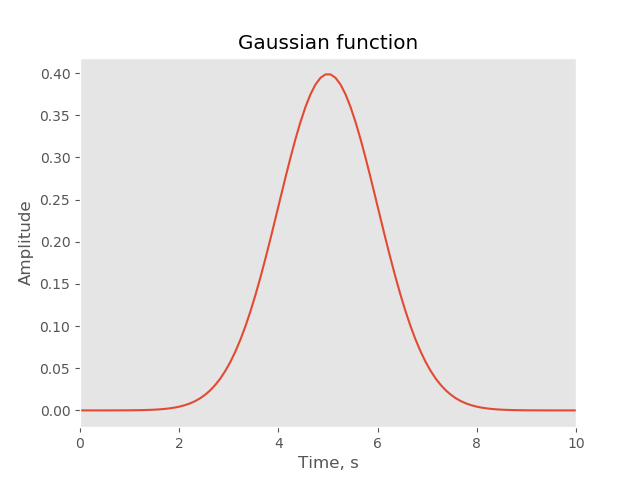

In [2]:
# Initial parameters
tmax=10.0                       # maximum time
nt=100                       # number of time sample
a=1                           # half-width      
dt=tmax/nt                    # defining dt
t0 = tmax/2                   # defining t0

time=np.linspace(0,tmax,nt)   # defining time

# Initialization gaussian function with zeros           
f=(1./np.sqrt(2*np.pi*a))*np.exp(-(((time-t0)**2)/(2*a)))  # eq.(4.32) p. 80
    
# Plotting of gaussian
plt.figure()
plt.plot(time, f)
plt.title('Gaussian function')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.xlim((0, tmax))
plt.grid()
plt.show()

In the cell below we calculate numerical derivative using two points

\begin{equation} 
f^{\prime}(t)=\dfrac{f(t+dt)-f(t-dt)}{2dt}
\end{equation} 

and analytical derivative
\begin{equation} 
f^{\prime}(t)=-\dfrac{t}{a}\dfrac{1}{\sqrt{2\pi a}}e^{-\dfrac{t^2}{2a}}
\end{equation} 

<IPython.core.display.Javascript object>


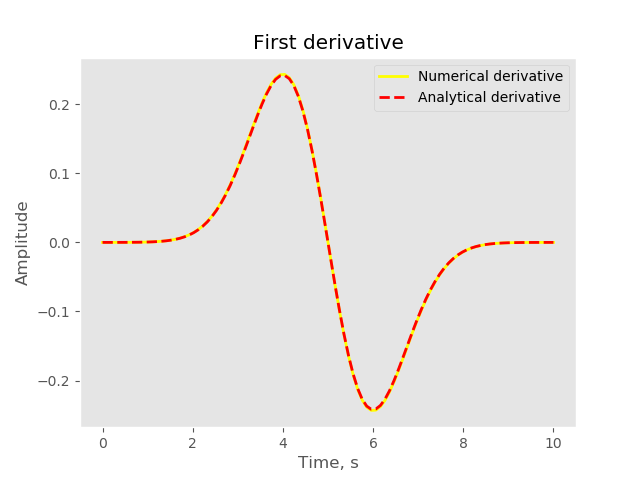

In [4]:
# First derivative with two points

# Initiation of numerical and analytical derivatives 
nder=np.zeros(nt)          # numerical derivative
ader=np.zeros(nt)          # analytical derivative

# Numerical derivative of the given function
for it in range (1, nt-1):
    nder[it]=(f[it+1]-f[it-1])/(2*dt)

# Analytical derivative of the given function
ader=(-(time-t0)/a)*(1/np.sqrt(2*np.pi*a))*np.exp(-(time-t0)**2/(2*a))     

# Plot of the first derivative and analytical derivative
plt.figure()
plt.plot (time, nder,label="Numerical derivative", lw=2, color="yellow")
plt.plot (time, ader, label="Analytical derivative", ls="--",lw=2, color="red")
plt.title('First derivative')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In the cell below calculation of the first derivative with four points is provided with the following weights:

\begin{equation}
f^{\prime}(t)=\dfrac{\dfrac{1}{12}f(t-2dt)-\dfrac{2}{3}f(t-dt)+\dfrac{2}{3}f(t+dt)-\dfrac{1}{12}f(t+2dt)}{dt}
\end{equation}

<IPython.core.display.Javascript object>


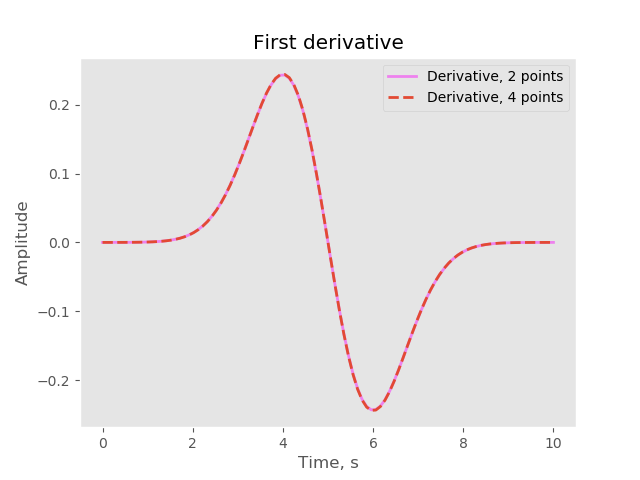

In [5]:
# First derivative with four points

# Initiation of derivative
ffder=np.zeros(nt) 

# Type your code here:  
for it in range (2, nt-2):
    ffder[it]=1/dt * (1/12*f[it-2] - 2/3*f[it-1] + 2/3*f[it+1] - 1/12*f[it+2])

# Plotting 
plt.figure()
plt.plot (time, nder,label="Derivative, 2 points", lw=2, color="violet")
plt.plot (time, ffder, label="Derivative, 4 points", lw=2, ls="--")
plt.title('First derivative')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()